Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import datetime as dt
import warnings; warnings.simplefilter('ignore')  

In [5]:
#for distance
from geopy.distance import great_circle

Importing the Dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data=pd.read_csv("/content/drive/MyDrive/ProjectsDatasets/nyc/train.csv")

Exploring the Dataset 

In [8]:
data.shape

(1458644, 11)

In [9]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [10]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [11]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [12]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [13]:
data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [14]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Feature Creation

---
Let us create some new features from the 
existing variables so that we can gain more insights from the data.

Remember pickup_datetime and dropoff_datetime were both of type object.
If we want to make use of this data, we can convert it to datetime object which contains numerous functions with which we can create new features that we will see soon.

We can convert it to datetime using the following code.

In [15]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

Now if you will run the dtypes function again, you will be able to see the type as datetime64.

Now, let us extract and create new features from this datetime features we just created.

In [16]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

Defining 4 time zones

In [17]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [18]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

In [19]:
data.head(n=6)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,Monday,0,0,17,17,3,3,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,Sunday,6,6,0,0,6,6,Late night,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,Tuesday,1,1,11,12,1,1,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,Wednesday,2,2,19,19,4,4,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,Saturday,5,5,13,13,3,3,Afternoon,Afternoon
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,...,Saturday,Saturday,5,5,22,22,1,1,Late night,Late night


Distance

---

Calculating distance using great_circle from geopy.distance

In [20]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [21]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [22]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.050375e+00,3.054422e+00,1.360648e+01,1.359890e+01,3.516818e+00,3.517178e+00,3.440869e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,1.954039e+00,1.956599e+00,6.399693e+00,6.483682e+00,1.681038e+00,1.681217e+00,4.296544e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00,2.000000e+00,2.000000e+00,1.231838e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,3.000000e+00,3.000000e+00,1.400000e+01,1.400000e+01,4.000000e+00,4.000000e+00,2.093720e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,5.000000e+00,5.000000e+00,1.900000e+01,1.900000e+01,5.000000e+00,5.000000e+00,3.875343e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,6.000000e+00,6.000000e+00,2.300000e+01,2.300000e+01,6.000000e+00,7.000000e+00,1.240910e+03


IQR Correction

---

Data Correction for exceptional irrelevent data, outliers. We can see above that features: distance and trip duration have very deferred maximum value as compared to the 75% value, thus we can say there are certain observations that act as outliers in the dataset.

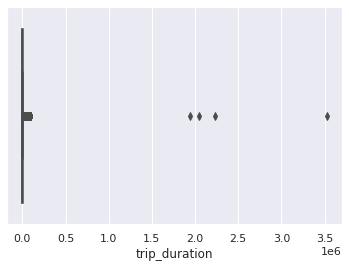

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(data['trip_duration'])
plt.show()

In [24]:
q1 = data['trip_duration'].quantile(0.25)
q3 = data['trip_duration'].quantile(0.75)
iqr=q3-q1
minimum = q1-(1.5*iqr)
minimum
maximum = q3+(1.5*iqr)
maximum
data=data[(data['trip_duration']<maximum) & (data['trip_duration']>minimum)]

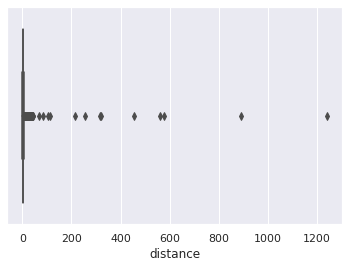

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(data['distance'])
plt.show()

In [26]:
q1 = data['distance'].quantile(0.25)
q3 = data['distance'].quantile(0.75)
iqr=q3-q1
minimum = q1-(1.5*iqr)
minimum
maximum = q3+(1.5*iqr)
maximum
data=data[(data['distance']<maximum) & (data['distance']>minimum)]

Univariate Analysis

---


The univariate analysis involves studying patterns of all variables individually.

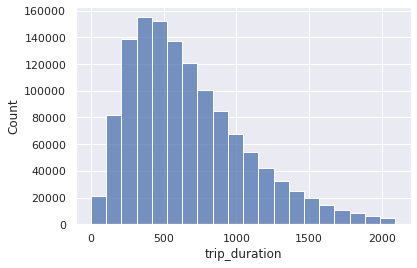

In [27]:
#trip_duration
sns.histplot(data['trip_duration'],kde=False,bins=20)

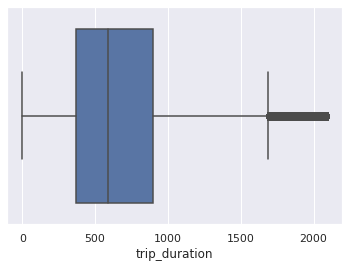

In [28]:
sns.boxplot(data['trip_duration'])

In [29]:
data['trip_duration'].sort_values(ascending=False)
#data.drop(data[data['trip_duration'] == outlier].index, inplace = True)

948317     2091
1183483    2091
235167     2091
744356     2091
1331883    2091
           ... 
533799        1
311745        1
346959        1
761666        1
918415        1
Name: trip_duration, Length: 1276662, dtype: int64

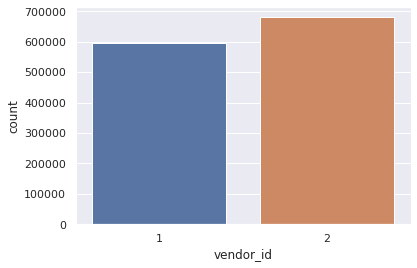

In [30]:
#vendor_id
sns.countplot(x='vendor_id',data=data)

In [31]:
#passenger_count
data.passenger_count.value_counts()

1    908368
2    181421
5     67806
3     52175
6     42251
4     24582
0        54
7         3
9         1
8         1
Name: passenger_count, dtype: int64

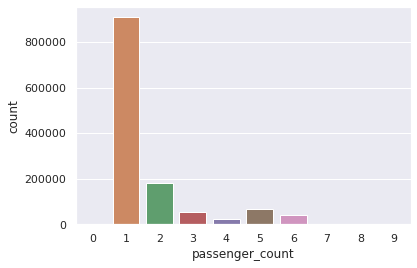

In [32]:
sns.countplot(x='passenger_count',data=data)

In [33]:
#Let's remove the rows which have 0 or 7 or 9 passenger count.
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [34]:
#store_and_fwd_flag
data['store_and_fwd_flag'].value_counts(normalize=True)

N    0.995207
Y    0.004793
Name: store_and_fwd_flag, dtype: float64

In [35]:
#distance
data['distance'].value_counts()

0.000000    5771
0.000424      45
0.000424      43
0.000424      35
0.000424      22
            ... 
2.058522       1
0.967414       1
1.988068       1
2.313009       1
1.134044       1
Name: distance, Length: 1270452, dtype: int64

Trips per Day

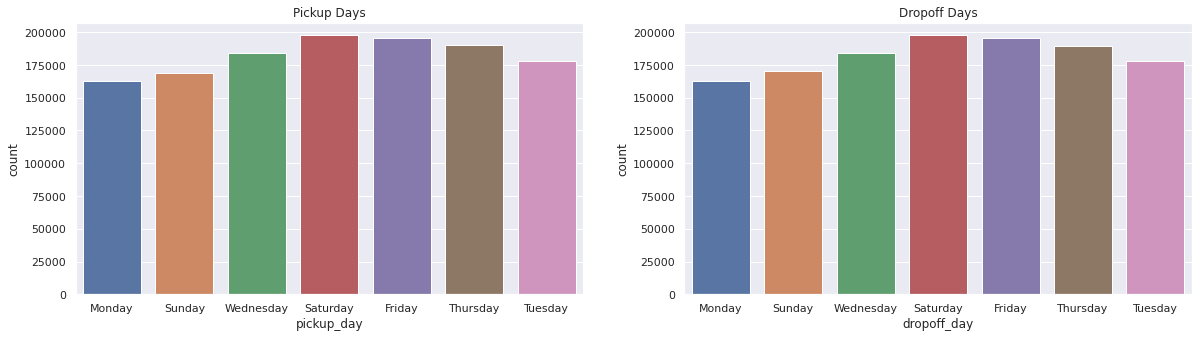

In [36]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)

Trips per Hour

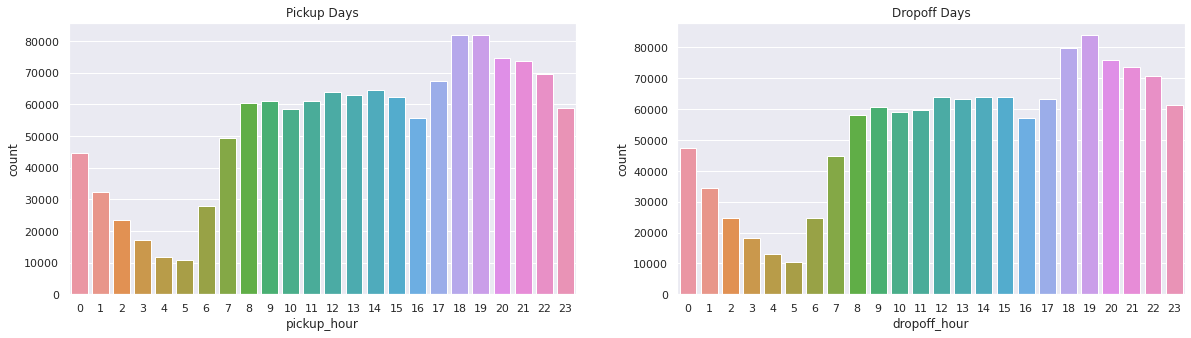

In [37]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)

Trips per Time of Day

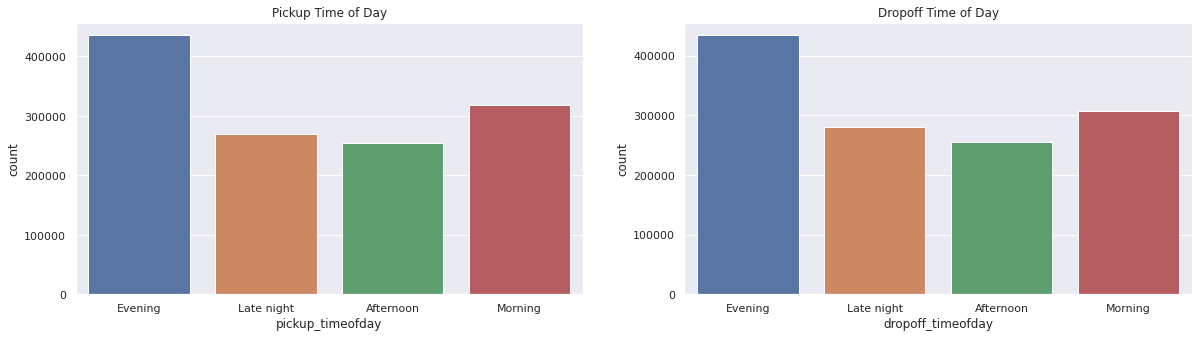

In [38]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=data,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=data,ax=ax4)

Trips per month

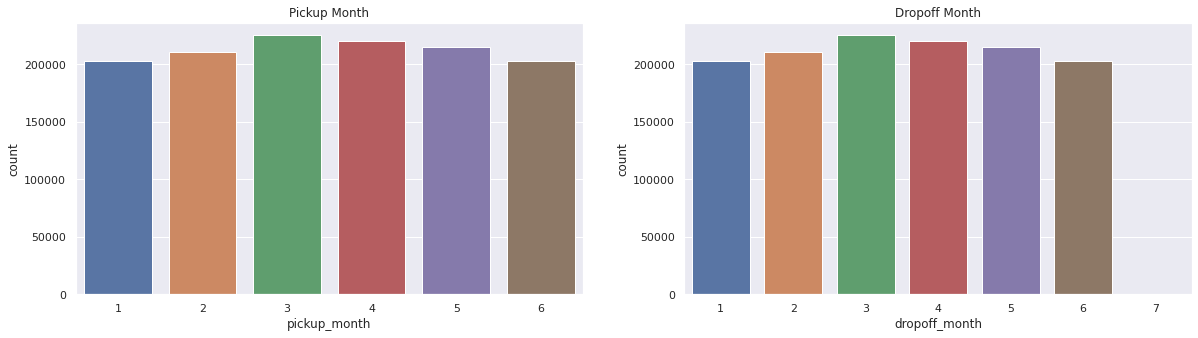

In [39]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax12)

Bivariate Analysis

---


Bivariate Analysis involves finding relationships, patterns, and correlations between two variables.

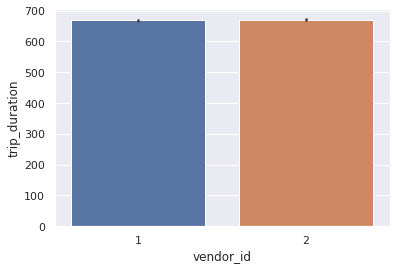

In [66]:
#Trip Duration per Vendor
sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)

In [41]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,0,0,17,17,3,3,Evening,Evening,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,6,6,0,0,6,6,Late night,Late night,1.805510
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,2,2,19,19,4,4,Evening,Evening,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,5,5,13,13,3,3,Afternoon,Afternoon,1.188590
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,...,Saturday,5,5,22,22,1,1,Late night,Late night,1.098944


<Figure size 720x720 with 0 Axes>

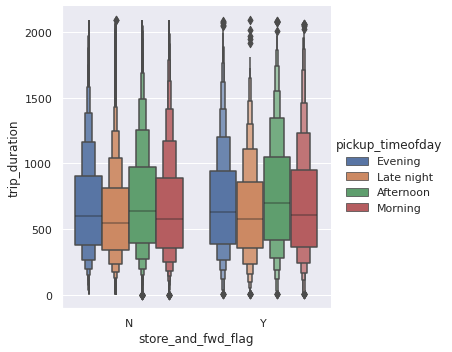

In [42]:
#Trip Duration per Store and Forward Flag
plt.figure(figsize=(10, 10))
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=data, kind="boxen", hue='pickup_timeofday')

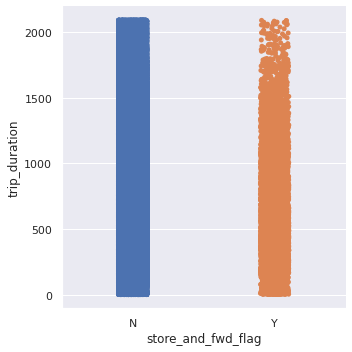

In [68]:
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=data,kind="strip")

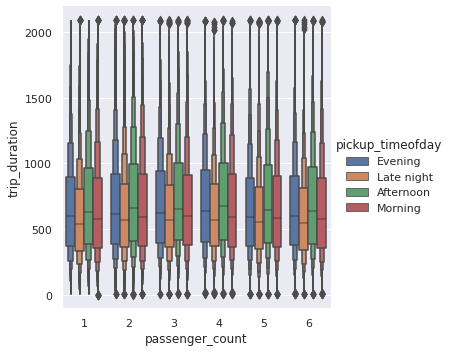

In [43]:
#Trip Duration per passenger count
sns.catplot(y='trip_duration',x='passenger_count',data=data, kind="boxen", hue="pickup_timeofday")

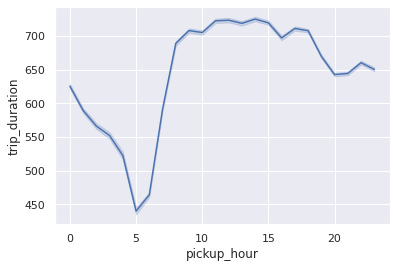

In [44]:
#Trip Duration per hour
sns.lineplot(x='pickup_hour',y='trip_duration',data=data)

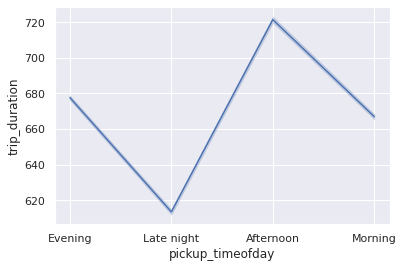

In [45]:
#Trip Duration per time of day
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=data)

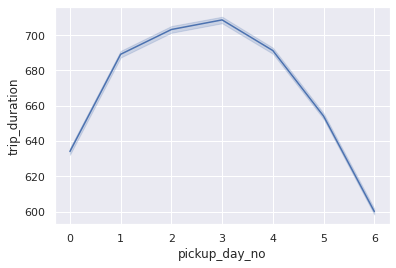

In [69]:
#Trip Duration per Day of Week
sns.lineplot(x='pickup_day_no',y='trip_duration',data=data)

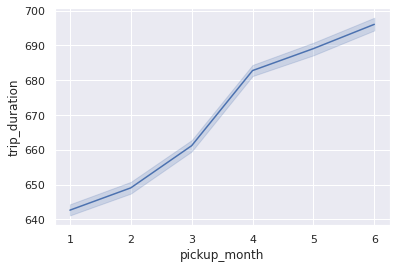

In [47]:
#Trip Duration per month
sns.lineplot(x='pickup_month',y='trip_duration',data=data)

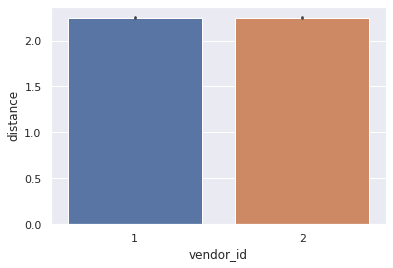

In [48]:
#Distance and Vendor
sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)

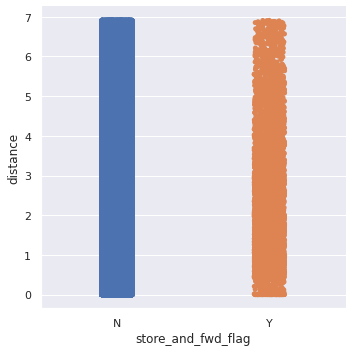

In [49]:
#Distance and Store and Forward Flag
sns.catplot(y='distance',x='store_and_fwd_flag',data=data,kind="strip")

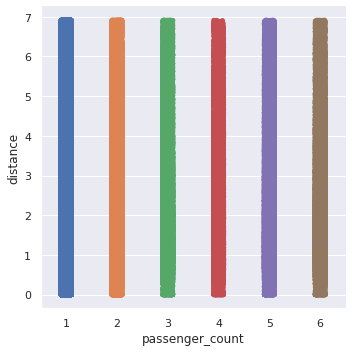

In [50]:
#Distance per passenger count
sns.catplot(y='distance',x='passenger_count',data=data,kind="strip")

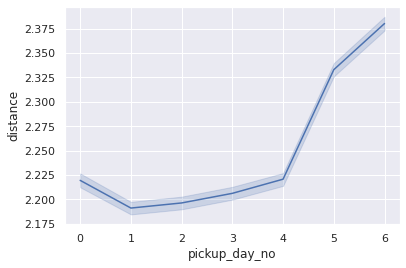

In [51]:
#Distance per day of week
sns.lineplot(x='pickup_day_no',y='distance',data=data)

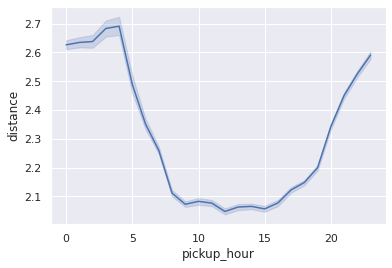

In [70]:
#Distance per hour of day
sns.lineplot(x='pickup_hour',y='distance',data=data)

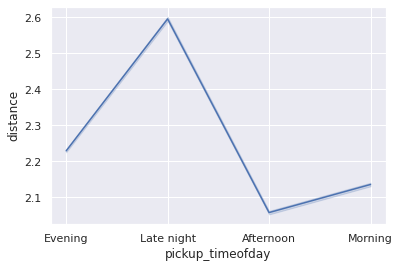

In [53]:
#Distance per time of day
sns.lineplot(x='pickup_timeofday',y='distance',data=data)

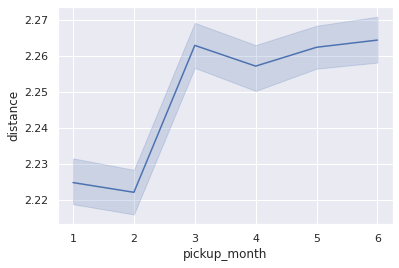

In [54]:
#Distance per month
sns.lineplot(x='pickup_month',y='distance',data=data)

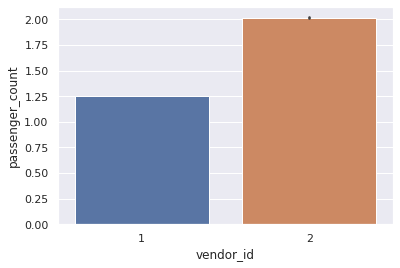

In [55]:
sns.barplot(y='passenger_count',x='vendor_id',data=data)

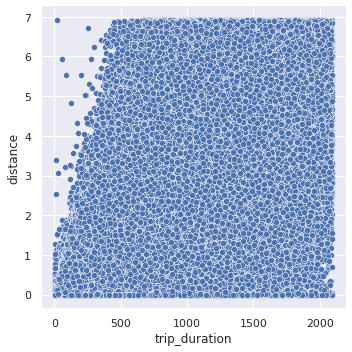

In [72]:
#Trip Duration and Distance
sns.relplot(y=data.distance,x='trip_duration',data=data)

We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

Let us see few rows whose distances are 0.

In [74]:
zerodis=data[data.distance == 0]
zerodis

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,...,Monday,0,0,18,18,2,2,Evening,Evening,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,...,Tuesday,1,1,18,18,5,5,Evening,Evening,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,...,Monday,0,0,23,23,5,5,Late night,Late night,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,...,Monday,0,0,19,19,1,1,Evening,Evening,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,...,Wednesday,2,2,22,22,1,1,Late night,Late night,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456399,id0618137,2,2016-02-17 08:57:04,2016-02-17 09:18:28,1,-73.978859,40.756721,-73.978859,40.756721,N,...,Wednesday,2,2,8,9,2,2,Morning,Morning,0.0
1456627,id1048767,2,2016-02-06 22:01:40,2016-02-06 22:03:47,1,-73.963554,40.768517,-73.963554,40.768517,N,...,Saturday,5,5,22,22,2,2,Late night,Late night,0.0
1456989,id2595295,2,2016-03-12 07:37:16,2016-03-12 07:46:42,1,-73.984848,40.728222,-73.984848,40.728222,N,...,Saturday,5,5,7,7,3,3,Morning,Morning,0.0
1457114,id0051314,2,2016-04-09 20:34:21,2016-04-09 20:44:53,1,-73.965981,40.770988,-73.965981,40.770988,N,...,Saturday,5,5,20,20,4,4,Evening,Evening,0.0


We can see even though distance is recorded as 0 but trip duration is definitely more.

One reason can be that the dropoff coordinates weren’t recorded.
Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.
 